# Load Libraries

In [1]:
#Load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib
import sklearn
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Modelling
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import time

In [3]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Dataset

In [4]:
#Loaddataset
df = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Dataset.xlsx")

In [5]:
df.head(10)

,tahun,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,2019,KABUPATEN BOGOR,62.27,0.697115,254,298,2791651,1740,1823,690,183,160,18954,9574,3607,5323,7.141827,10.615385,11.794189,373799
1,2019,KABUPATEN SUKABUMI,57.34,0.808399,266,103,1120711,620,1211,330,78,183,9325,4576,1698,2221,7.678947,12.200000,14.206349,309676
2,2019,KABUPATEN CIANJUR,56.51,0.833333,252,193,1081183,597,1256,314,92,139,11556,4979,1605,3167,7.320113,12.269341,13.418338,350760
3,2019,KABUPATEN BANDUNG,64.52,0.744444,161,111,1786162,2015,1406,322,108,179,14767,6728,2755,2986,6.055762,10.744444,14.003704,345177
4,2019,KABUPATEN GARUT,57.87,0.857482,315,233,1155071,743,1584,381,124,136,12297,5930,2744,3598,7.619048,11.680191,12.480861,301202
5,2019,KABUPATEN TASIKMALAYA,58.68,0.917379,271,153,867603,704,1086,259,67,69,8413,4403,1412,2773,6.347578,10.170940,12.014327,311848
6,2019,KABUPATEN CIAMIS,63.94,0.794574,182,107,624897,886,745,121,27,44,6381,2824,1032,1600,5.735409,9.197674,10.311284,363750
7,2019,KABUPATEN KUNINGAN,58.21,0.941828,323,226,502051,1054,652,103,28,108,6431,2915,1239,1912,6.382271,9.988858,13.530556,340775
8,2019,KABUPATEN CIREBON,56.37,0.849515,329,248,1064928,2224,921,187,47,56,9217,4974,1450,2827,6.260976,9.364078,9.090024,381372
9,2019,KABUPATEN MAJALENGKA,57.55,0.921212,288,250,627874,1086,667,104,22,90,6340,2750,1002,1722,4.939394,8.726444,11.192661,445184


**Check Data Type**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   tahun                                                          54 non-null     int64  
 1   kabupaten                                                      54 non-null     object 
 2   indeks_pendidikan                                              54 non-null     float64
 3   status_kegiatan_buta_aksara                                    54 non-null     float64
 4   ketersediaan_pkbm                                              54 non-null     int64  
 5   ketersediaan_tbm                                               54 non-null     int64  
 6   jumlah_angkatan_kerja                                          54 non-null     int64  
 7   kepadatan_penduduk                                             5

In [7]:
df.describe()

,tahun,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
count,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2020.000000,60.317778,0.787740,202.444444,132.296296,1.029097e+06,1252.814815,936.185185,238.111111,65.592593,118.574074,9254.962963,4127.500000,1536.925926,2454.518519,6.001127,9.858420,11.638714,383816.000000
std,0.824163,3.566387,0.104981,83.807656,69.990196,6.029675e+05,563.052565,411.636727,156.336920,45.650237,68.953800,4246.606156,2016.836377,825.546265,1080.368835,1.300052,1.881185,2.401256,57885.395357
min,2019.000000,53.970000,0.437500,0.000000,0.000000,9.437800e+04,597.000000,86.000000,25.000000,5.000000,17.000000,955.000000,561.000000,192.000000,510.000000,1.812500,3.312500,3.875000,301202.000000
25%,2019.000000,57.580000,0.753998,150.500000,98.250000,6.428000e+05,821.250000,672.250000,121.250000,28.250000,69.250000,6707.250000,2735.750000,1014.750000,1653.500000,5.525919,9.207364,10.987987,342661.250000
50%,2020.000000,59.510000,0.796578,210.000000,117.500000,9.384075e+05,1082.500000,899.500000,191.000000,50.500000,109.000000,8477.500000,3809.000000,1375.000000,2520.500000,6.023569,10.112064,12.442145,367338.000000
75%,2021.000000,63.847500,0.850091,263.750000,179.500000,1.162275e+06,1697.500000,1212.500000,336.750000,93.500000,154.750000,11521.500000,4988.000000,1646.250000,2975.000000,6.948090,11.001058,13.413754,404195.500000
max,2021.000000,67.390000,0.952909,329.000000,298.000000,2.791651e+06,2468.000000,1850.000000,724.000000,192.000000,359.000000,20859.000000,9639.000000,3707.000000,5746.000000,8.144444,12.528090,14.206349,549875.000000


**Cek distribusi Indeks Pendidikan**

Dengan menggunakan Kernel density function (KDE) maupun distribution plot (distplot)

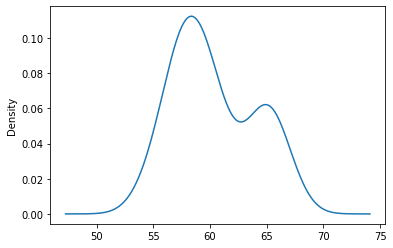

In [8]:
df['indeks_pendidikan'].plot.kde()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


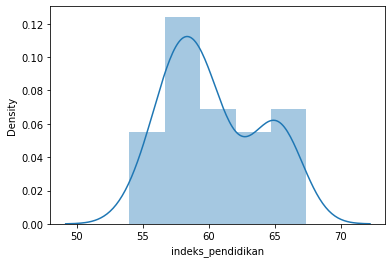

In [9]:
sns.distplot(df['indeks_pendidikan'])

Dapat terlihat di awal bahwa indeks pendidikan paling banyak berada di antara 55 dan 60

## Feature Engineering

**Lakukan Standard Scaler pada fitur dan juga target**

In [10]:
#Preprocessing Feature
%time
scaler_fitur = StandardScaler()
columnscale= [
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
#scaler.fit(df[columnscale])
#scaler.transform(df[columnscale])
df_fitur = df[columnscale]
df_scaled_fitur = pd.DataFrame(scaler_fitur.fit_transform(df_fitur),columns = df_fitur.columns)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [11]:
df_scaled_fitur.head(5)

,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601


In [12]:
#Preprocessing target
from sklearn.preprocessing import StandardScaler
scaler_target = StandardScaler()
columnscale= [ 'indeks_pendidikan']
df_target = df[columnscale]
df_scaled_target = pd.DataFrame(scaler_target.fit_transform(df_target),columns = df_target.columns)

In [13]:
df_scaled_target.head(5)

,indeks_pendidikan
0,0.552535
1,-0.842796
2,-1.077710
3,1.189349
4,-0.692791


In [14]:
df_scaled = df_scaled_target.join(df_scaled_fitur)
df_scaled.head(10)

,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


In [15]:
df_ready =df_scaled.copy()
df_ready.head(10)

,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


## Cek untuk tipe data dan data kosong

**Cek ulang data type, pastikan semua sudah numerik**

In [16]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   indeks_pendidikan                                              54 non-null     float64
 1   status_kegiatan_buta_aksara                                    54 non-null     float64
 2   ketersediaan_pkbm                                              54 non-null     float64
 3   ketersediaan_tbm                                               54 non-null     float64
 4   jumlah_angkatan_kerja                                          54 non-null     float64
 5   kepadatan_penduduk                                             54 non-null     float64
 6   Jumlah SD                                                      54 non-null     float64
 7   Jumlah SMP                                                     5

**Cek ulang juga agar tidak ada data yang kosong**

In [17]:
df_ready.isna().sum()

indeks_pendidikan                                                0
status_kegiatan_buta_aksara                                      0
ketersediaan_pkbm                                                0
ketersediaan_tbm                                                 0
jumlah_angkatan_kerja                                            0
kepadatan_penduduk                                               0
Jumlah SD                                                        0
Jumlah SMP                                                       0
Jumlah SMA                                                       0
Jumlah SMK                                                       0
Jumlah Guru SD                                                   0
Jumlah Guru SMP                                                  0
Jumlah Guru SMA                                                  0
Jumlah Guru SMK                                                  0
waktu_tempuh_sd_terdekat                                      

## Hipotesis testing

Lakukan random cek tambahan dengan uji multikolinearitas antar variabel yaitu antara **Ketersediaan pusat kegiatan belajar** (ketersediaan_pkbm) terhadap **Jumlah perpustakaan** (ketersediaan_tbm)

Gunakan VIF indicator (Variation Inflation Factor). Asumsi jika VIF>10, maka dianggap terdapat multikolinearitas antara variable

H0: ketersediaan pusat kegiatan belajar dan Jumlah Perpustakaan itu independen.

H1: ketersediaan pusat kegiatan belajar dan Jumlah Perpustakaan itu dependen.

In [18]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [19]:
data_crosstab = pd.crosstab(df_ready['ketersediaan_pkbm'],
                            df_ready['ketersediaan_tbm'],
                           margins=True, margins_name="Total")
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [20]:
print('P-Val, Attribute_0: ',p)

P-Val, Attribute_0:  0.8849445045321574


In [21]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=2407.563, stat=2214.000


In [22]:
# interpret test-statistic
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are independent (We fail to reject H0)


In [23]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.3f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.885
The variables are independent (We fail to reject H0)


Menunjukkan bahwa tidak ada multikolinearitas antara Ketersediaan pusat kegiatan belajar (ketersediaan_pkbm) terhadap Jumlah perpustakaan  (ketersediaan_tbm)

# Modelling

## Read & Splitting Data

In [24]:
def read_data(df):
    trainFeat= [
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

    y = df['indeks_pendidikan'] #Target
    X = df[trainFeat] #Features
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=420)

    return x_train, y_train, x_valid, y_valid, x_test, y_test


In [25]:
x_train, y_train, x_valid, y_valid, x_test, y_test = read_data(df_ready)

In [26]:
x_train.head(10)

,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
53,-3.367546,-2.438266,-1.907961,-1.564754,0.568621,-2.084771,-1.369496,-1.339786,-1.486906,-1.958822,-1.781965,-1.643209,-1.816766,-3.252145,-3.512353,-3.263548,-0.463948
11,-0.075039,0.416191,-0.235023,-0.228902,-0.610982,-0.100992,-0.194412,-0.278440,-0.169429,-0.395751,0.064312,-0.090389,0.455455,-1.033593,-1.394828,-1.843471,1.297786
10,-0.131394,-0.101706,-0.220601,-0.769087,-0.883474,-0.826824,-0.820693,-0.875447,0.269731,-0.609199,-0.590819,-0.567239,-0.419986,0.355704,0.996948,1.009842,-0.727903
47,-0.479552,-0.029441,-0.422508,-0.124843,-0.589470,-0.100992,-0.155673,-0.300551,0.269731,-0.355580,-0.194437,-0.523222,0.337733,-1.086359,-1.127411,-1.379924,1.707816
20,0.601348,0.524589,0.558180,0.261984,-1.139831,0.747448,0.722411,0.628127,0.987024,0.718793,0.475708,0.026990,0.742285,1.065881,1.126310,0.529115,-0.211293
50,0.066085,0.127132,0.486071,0.221149,0.366045,0.006902,-0.278347,-0.366885,-0.052320,0.135969,-0.156901,-0.054931,0.316244,-0.068845,0.019962,0.718503,1.924864
23,1.356051,0.645030,-0.119648,-0.141273,-0.978488,0.372271,0.192978,0.053231,0.255092,-0.016867,0.004755,-0.215103,0.369499,-0.034056,0.126414,0.065396,-1.045148
0,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
21,-1.021670,-0.667780,-0.581148,1.152205,1.387889,1.159407,0.632020,0.959798,0.284369,1.547630,1.299501,1.310818,0.583454,-0.259683,0.350215,0.586241,-0.286205
39,-1.128503,-0.860486,-0.840742,1.332249,1.438085,1.164311,0.644933,0.959798,0.299008,1.368172,1.165872,1.170208,0.428360,-0.311444,0.145782,0.451903,-0.087136


In [27]:
y_train.head(10)

53    1.611062
11   -1.796603
10    0.920472
47   -1.281491
20   -0.871099
50   -0.220133
23   -0.285230
0     0.552535
21    1.359167
39    1.469548
Name: indeks_pendidikan, dtype: float64

In [28]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = metrics.mean_absolute_percentage_error(true, predicted)
    exp_var = metrics.explained_variance_score(true, predicted)
    Data_perbandingan= pd.DataFrame ({'Root Mean Squared Error': [rmse],
                                  'R2(Coef of determination)': [r2_square],
                                  'Mean Absolut Error': [mae],
                                  'Mean Squared Error': [mse],
                                  'Mean Absolute Percentage Error': [exp_var],
                                  'Variance Score' : [exp_var]})
    return mae, mse, rmse, r2_square, mape, exp_var, Data_perbandingan

## Model Linear Regression

In [29]:
%%time
LinearReg = LinearRegression()

param_linear = {'fit_intercept': ['True','False']}

LinearRegression_cv = RandomizedSearchCV(LinearReg ,
                        param_distributions = param_linear,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
LinearRegression_cv.fit(x_train,y_train)

CPU times: user 106 ms, sys: 0 ns, total: 106 ms
Wall time: 130 ms


The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': ['True', 'False']},
                   scoring='neg_mean_squared_error')

In [30]:
print("Tuned hyperparameters : {}".format(LinearRegression_cv.best_params_))
print("Best rmse: {}".format(LinearRegression_cv.best_score_))
print("Best Estimator: {}".format(LinearRegression_cv.best_estimator_))

Tuned hyperparameters : {'fit_intercept': 'True'}
Best rmse: -6.0575483358390745
Best Estimator: LinearRegression(fit_intercept='True')


In [31]:
metrics_linear = evaluate(y_valid, LinearRegression_cv.predict(x_valid))
print("metrics score untuk Linear Regression: ")
print(metrics_linear[6])

metrics score untuk Linear Regression: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.630759                   0.657277            0.492805   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.397858                        0.685558        0.685558  


## Model Lasso

In [32]:
%%time
lasso = Lasso(random_state=42, selection='random')

param_lasso = {'alpha': np.random.uniform(0.01,1,10),
                'selection': ['cyclic','random']}

lasso_cv = RandomizedSearchCV(lasso,
                        param_distributions = param_lasso,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
lasso_cv.fit(x_train,y_train)

CPU times: user 311 ms, sys: 12.5 ms, total: 323 ms
Wall time: 329 ms


RandomizedSearchCV(cv=5, estimator=Lasso(random_state=42, selection='random'),
                   param_distributions={'alpha': array([0.25279454, 0.73461976, 0.01314273, 0.04476953, 0.57038242,
       0.13793723, 0.45550603, 0.50252726, 0.10720825, 0.65951012]),
                                        'selection': ['cyclic', 'random']},
                   scoring='neg_mean_squared_error')

In [33]:
print("Tuned hyperparameters : {}".format(lasso_cv.best_params_))
print("Best rmse: {}".format(lasso_cv.best_score_))
print("Best Estimator: {}".format(lasso_cv.best_estimator_))

Tuned hyperparameters : {'selection': 'cyclic', 'alpha': 0.04476952763186859}
Best rmse: -0.6073997070673961
Best Estimator: Lasso(alpha=0.04476952763186859, random_state=42)


In [34]:
metrics_lasso = evaluate(y_valid, lasso_cv.predict(x_valid))
print("metrics score untuk lasso: ")
print(metrics_lasso[6])

metrics score untuk lasso: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.839908                   0.392314            0.670084   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.705445                        0.435142        0.435142  


## Model Ridge

In [35]:
%%time
RidgeModel = Ridge()

param_Ridge = {'alpha': np.random.uniform(0.01,1,10),
               'solver': ['auto', 'svd', 'lsqr', 'sparse_cg', 'saga'],
               'tol': np.random.uniform(0.001,0.1,10)}

Ridge_cv = RandomizedSearchCV(RidgeModel ,
                        param_distributions = param_Ridge,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
Ridge_cv.fit(x_train,y_train)

CPU times: user 302 ms, sys: 4.3 ms, total: 306 ms
Wall time: 308 ms


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([0.49899412, 0.95876904, 0.12298175, 0.95864581, 0.32894523,
       0.02955692, 0.54513935, 0.17985415, 0.39955071, 0.44037966]),
                                        'solver': ['auto', 'svd', 'lsqr',
                                                   'sparse_cg', 'saga'],
                                        'tol': array([0.08598318, 0.05398049, 0.04304987, 0.0501303 , 0.00303773,
       0.0732297 , 0.09891862, 0.09812542, 0.09112164, 0.08260953])},
                   scoring='neg_mean_squared_error')

In [36]:
print("Tuned hyperparameters : {}".format(Ridge_cv.best_params_))
print("Best rmse: {}".format(Ridge_cv.best_score_))
print("Best Estimator: {}".format(Ridge_cv.best_estimator_))

Tuned hyperparameters : {'tol': 0.09812542297989714, 'solver': 'sparse_cg', 'alpha': 0.3995507142235352}
Best rmse: -0.6485899569582818
Best Estimator: Ridge(alpha=0.3995507142235352, solver='sparse_cg', tol=0.09812542297989714)


In [37]:
metrics_ridge = evaluate(y_valid, Ridge_cv.predict(x_valid))
print("metrics score untuk Ridge: ")
print(metrics_ridge[6])

metrics score untuk Ridge: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.860564                   0.362057            0.685772   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0             0.74057                        0.384547        0.384547  


## Model Bayesian Ridge

In [38]:
%%time
BayesReg = BayesianRidge()

param_bayesreg = {'alpha_1': np.random.uniform(0.000001,0.00001,10)}

bayesreg_cv = RandomizedSearchCV(BayesReg,
                        param_distributions = param_bayesreg,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
bayesreg_cv.fit(x_train,y_train)

CPU times: user 388 ms, sys: 10.3 ms, total: 398 ms
Wall time: 407 ms


RandomizedSearchCV(cv=5, estimator=BayesianRidge(),
                   param_distributions={'alpha_1': array([2.37142664e-06, 2.24719306e-06, 4.88803064e-06, 1.63224979e-06,
       1.53006632e-06, 8.28806291e-06, 2.96793137e-06, 3.06280961e-06,
       6.57035892e-06, 8.69742627e-06])},
                   scoring='neg_mean_squared_error')

In [39]:
print("Tuned hyperparameters : {}".format(bayesreg_cv.best_params_))
print("Best rmse: {}".format(bayesreg_cv.best_score_))
print("Best Estimator: {}".format(bayesreg_cv.best_estimator_))

Tuned hyperparameters : {'alpha_1': 8.697426267414705e-06}
Best rmse: -0.7416834249146451
Best Estimator: BayesianRidge(alpha_1=8.697426267414705e-06)


In [40]:
metrics_bayesreg = evaluate(y_valid, bayesreg_cv.predict(x_valid))
print("metrics score untuk Bayesian Ridge: ")
print(metrics_bayesreg[6])

metrics score untuk Bayesian Ridge: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.802067                   0.445838            0.625387   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.643311                        0.484352        0.484352  


## Model Elastic Net


In [41]:
%%time
elasticnetreg = ElasticNet(max_iter=10000)

param_elasticnetreg = {'alpha': np.random.uniform(0.01,1,10),
                       'l1_ratio': [0.5],
                       'tol': np.random.uniform(0.001,0.1,10)}

elasticnet_cv = RandomizedSearchCV(elasticnetreg,
                        param_distributions = param_elasticnetreg,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
elasticnet_cv.fit(x_train,y_train)

CPU times: user 379 ms, sys: 21.1 ms, total: 401 ms
Wall time: 408 ms


RandomizedSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
                   param_distributions={'alpha': array([0.12763477, 0.29388877, 0.02674276, 0.57709855, 0.54261708,
       0.20581994, 0.47667222, 0.4433038 , 0.91719671, 0.61251172]),
                                        'l1_ratio': [0.5],
                                        'tol': array([0.05282519, 0.05717789, 0.02315443, 0.06655695, 0.08618791,
       0.03304623, 0.02440378, 0.07899151, 0.04917273, 0.08053879])},
                   scoring='neg_mean_squared_error')

In [42]:
print("Tuned hyperparameters : {}".format(elasticnet_cv.best_params_))
print("Best rmse: {}".format(elasticnet_cv.best_score_))
print("Best Estimator: {}".format(elasticnet_cv.best_estimator_))

Tuned hyperparameters : {'tol': 0.033046225730102685, 'l1_ratio': 0.5, 'alpha': 0.12763477210445956}
Best rmse: -0.6399231880885191
Best Estimator: ElasticNet(alpha=0.12763477210445956, max_iter=10000, tol=0.033046225730102685)


In [43]:
metrics_elasticnet = evaluate(y_valid, elasticnet_cv.predict(x_valid))
print("metrics score untuk Elastic Net: ")
print(metrics_elasticnet[6])

metrics score untuk Elastic Net: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.826174                   0.412025            0.651681   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.682564                        0.460968        0.460968  


## Model Huber Regression

In [44]:
%%time
HuberReg = HuberRegressor(max_iter=10000)

param_huber = {'alpha': np.random.uniform(0.01,1,10),
                       'epsilon': np.random.uniform(1.01,10,10)}

huber_cv = RandomizedSearchCV(HuberReg,
                        param_distributions = param_huber,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
huber_cv.fit(x_train,y_train)

CPU times: user 1.62 s, sys: 45.8 ms, total: 1.67 s
Wall time: 1.71 s


RandomizedSearchCV(cv=5, estimator=HuberRegressor(max_iter=10000),
                   param_distributions={'alpha': array([0.87821577, 0.61504128, 0.17939618, 0.5754898 , 0.49558625,
       0.20180755, 0.50616757, 0.62251365, 0.25009555, 0.80716313]),
                                        'epsilon': array([3.23302195, 2.86417254, 7.83672348, 1.92614004, 5.72330914,
       5.20861464, 4.63170035, 3.42129858, 3.51863685, 1.24205278])},
                   scoring='neg_mean_squared_error')

In [45]:
print("Tuned hyperparameters : {}".format(huber_cv.best_params_))
print("Best rmse: {}".format(huber_cv.best_score_))
print("Best Estimator: {}".format(huber_cv.best_estimator_))

Tuned hyperparameters : {'epsilon': 7.836723481044431, 'alpha': 0.8071631254686303}
Best rmse: -1.2508565854177869
Best Estimator: HuberRegressor(alpha=0.8071631254686303, epsilon=7.836723481044431,
               max_iter=10000)


In [46]:
metrics_huber = evaluate(y_valid, huber_cv.predict(x_valid))
print("metrics score untuk Huber: ")
print(metrics_huber[6])

metrics score untuk Huber: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.710944                   0.564602             0.55861   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.505442                        0.620131        0.620131  


## Model Random Forest Regression

In [47]:
%%time
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

param_rf = {"n_estimators": [100, 250, 500, 1000]}

rf_cv = RandomizedSearchCV(rf,
                        param_distributions = param_rf,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
rf_cv.fit(x_train,y_train)

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 10.2 s, sys: 520 ms, total: 10.7 s
Wall time: 24.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   param_distributions={'n_estimators': [100, 250, 500, 1000]},
                   scoring='neg_mean_squared_error')

In [48]:
print("Tuned hyperparameters : {}".format(rf_cv.best_params_))
print("Best rmse: {}".format(rf_cv.best_score_))
print("Best Estimator: {}".format(rf_cv.best_estimator_))

Tuned hyperparameters : {'n_estimators': 500}
Best rmse: -0.6250165481036596
Best Estimator: RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)


In [49]:
metrics_rf = evaluate(y_valid, rf_cv.predict(x_valid))
print( "metrics score untuk random forest Regression: ")
print(metrics_rf[6])

metrics score untuk random forest Regression: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.530128                    0.75791            0.414744   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.281036                         0.77577         0.77577  


## Model Decision Tree Regression

In [50]:
%%time
DecisionTree = DecisionTreeRegressor()

param_decisiontree = {'criterion': ['squared_error','friedman_mse','absolute_error'],
                      'splitter':['best','random']}

decisiontree_cv = RandomizedSearchCV(DecisionTree ,
                        param_distributions = param_decisiontree,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
decisiontree_cv.fit(x_train,y_train)

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 200 ms, sys: 4.78 ms, total: 205 ms
Wall time: 254 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [51]:
print("Tuned hyperparameters : {}".format(decisiontree_cv.best_params_))
print("Best rmse: {}".format(decisiontree_cv.best_score_))
print("Best Estimator: {}".format(decisiontree_cv.best_estimator_))

Tuned hyperparameters : {'splitter': 'random', 'criterion': 'squared_error'}
Best rmse: -0.44144303275272395
Best Estimator: DecisionTreeRegressor(splitter='random')


In [52]:
metrics_decision = evaluate(y_valid, decisiontree_cv.predict(x_valid))
print("metrics score untuk Decision Tree: ")
print(metrics_decision[6])

metrics score untuk Decision Tree: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                  0.79075                   0.461365            0.389007   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.625286                         0.55799         0.55799  


## Model Support Vector Regression

In [53]:
%%time
svr = LinearSVR(loss = 'squared_epsilon_insensitive', dual=False, max_iter=10000)

param_svr = {'tol':[0.001, 0.01, 0.1, 1],
             'C': [0.1, 0.25, 0.5, 1, 1.25]}

svr_cv = RandomizedSearchCV(svr,
                        param_distributions = param_svr,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
svr_cv.fit(x_train,y_train)

CPU times: user 334 ms, sys: 3.11 ms, total: 337 ms
Wall time: 522 ms


RandomizedSearchCV(cv=5,
                   estimator=LinearSVR(dual=False,
                                       loss='squared_epsilon_insensitive',
                                       max_iter=10000),
                   param_distributions={'C': [0.1, 0.25, 0.5, 1, 1.25],
                                        'tol': [0.001, 0.01, 0.1, 1]},
                   scoring='neg_mean_squared_error')

In [54]:
print("Tuned hyperparameters : {}".format(svr_cv.best_params_))
print("Best rmse: {}".format(svr_cv.best_score_))
print("Best Estimator: {}".format(svr_cv.best_estimator_))

Tuned hyperparameters : {'tol': 0.1, 'C': 0.1}
Best rmse: -0.6529152474901176
Best Estimator: LinearSVR(C=0.1, dual=False, loss='squared_epsilon_insensitive', max_iter=10000,
          tol=0.1)


In [55]:
metrics_svr = evaluate(y_valid, svr_cv.predict(x_valid))
print( "metrics score untuk Support Vector Regression: ")
print(metrics_svr[6])

metrics score untuk Support Vector Regression: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.826761                    0.41119            0.641033   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.683533                        0.435662        0.435662  


## Model Stochastic Gradient Descent (SGD) Regression

In [56]:
%%time
SGDReg = SGDRegressor()

param_SGDReg = {'alpha': np.random.uniform(0.01,1,10),
                'penalty': ['l2','l1']}

gradientdescent_cv = RandomizedSearchCV(SGDReg,
                        param_distributions = param_SGDReg ,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
gradientdescent_cv.fit(x_train,y_train)

CPU times: user 446 ms, sys: 3.3 ms, total: 449 ms
Wall time: 584 ms


RandomizedSearchCV(cv=5, estimator=SGDRegressor(),
                   param_distributions={'alpha': array([0.5489367 , 0.03929027, 0.83372149, 0.76032499, 0.15192472,
       0.31246452, 0.8640783 , 0.86989289, 0.58443009, 0.68065975]),
                                        'penalty': ['l2', 'l1']},
                   scoring='neg_mean_squared_error')

In [57]:
print("Tuned hyperparameters : {}".format(gradientdescent_cv.best_params_))
print("Best rmse: {}".format(gradientdescent_cv.best_score_))
print("Best Estimator: {}".format(gradientdescent_cv.best_estimator_))

Tuned hyperparameters : {'penalty': 'l2', 'alpha': 0.548936700391362}
Best rmse: -0.7104596513654514
Best Estimator: SGDRegressor(alpha=0.548936700391362)


In [58]:
metrics_sgd = evaluate(y_valid, gradientdescent_cv.predict(x_valid))
print("metrics score untuk Stochastic Gradient Descent: ")
print(metrics_sgd[6])

metrics score untuk Stochastic Gradient Descent: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.826035                   0.412222             0.66132   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.682334                        0.461742        0.461742  


## Model Gradient Boosting Regression

In [59]:
%%time
GBR = GradientBoostingRegressor(min_samples_leaf = 4,
                                     min_samples_split = 10,
                                     max_features = 7,
                                     max_depth = 50,
                                     n_estimators = 500,
                                     subsample = 0.2,
                                     random_state = 0)

param_GBR = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}

GBR_cv = RandomizedSearchCV(GBR,
                        param_distributions = param_GBR,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
GBR_cv.fit(x_train,y_train)

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 12.8 s, sys: 86.7 ms, total: 12.9 s
Wall time: 25.1 s


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(max_depth=50,
                                                       max_features=7,
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       n_estimators=500,
                                                       random_state=0,
                                                       subsample=0.2),
                   param_distributions={'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile']},
                   scoring='neg_mean_squared_error')

In [60]:
print("Tuned hyperparameters : {}".format(GBR_cv.best_params_))
print("Best rmse: {}".format(GBR_cv.best_score_))
print("Best Estimator: {}".format(GBR_cv.best_estimator_))

Tuned hyperparameters : {'loss': 'squared_error'}
Best rmse: -1.1083415736005624
Best Estimator: GradientBoostingRegressor(max_depth=50, max_features=7, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=500,
                          random_state=0, subsample=0.2)


In [61]:
metrics_GBR = evaluate(y_valid, GBR_cv.predict(x_valid))
print( "metrics score untuk Gradient Boosting Regression: ")
print(metrics_GBR[6])

metrics score untuk Gradient Boosting Regression: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 1.158814                  -0.156761            0.988032   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            1.342851                             0.0             0.0  


## Model KNeighbors Regression

In [62]:
%%time
knnreg = KNeighborsRegressor()

param_knnreg = {'n_neighbors': [3,5,10,20]}

knnreg_cv = RandomizedSearchCV(knnreg ,
                        param_distributions = param_knnreg,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )

knnreg_cv.fit(x_train,y_train)

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 192 ms, sys: 1.97 ms, total: 194 ms
Wall time: 446 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [3, 5, 10, 20]},
                   scoring='neg_mean_squared_error')

In [63]:
print("Tuned hyperparameters : {}".format(knnreg_cv.best_params_))
print("Best rmse: {}".format(knnreg_cv.best_score_))
print("Best Estimator: {}".format(knnreg_cv.best_estimator_))

Tuned hyperparameters : {'n_neighbors': 3}
Best rmse: -0.6103379522165977
Best Estimator: KNeighborsRegressor(n_neighbors=3)


In [64]:
metrics_knnreg = evaluate(y_valid, knnreg_cv.predict(x_valid))
print("metrics score untuk KNeighbors Regression: ")
print(metrics_knnreg[6])

metrics score untuk KNeighbors Regression: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.677372                   0.604751            0.622034   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.458833                        0.605115        0.605115  


## Model Adaboost

In [65]:
%%time
Adaboost = AdaBoostRegressor()

param_adaboost = {'loss': ['linear','square','exponential']}

adaboost_cv = RandomizedSearchCV(Adaboost ,
                        param_distributions = param_adaboost,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
adaboost_cv.fit(x_train,y_train)

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 2.3 s, sys: 31 ms, total: 2.33 s
Wall time: 4.99 s


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'loss': ['linear', 'square',
                                                 'exponential']},
                   scoring='neg_mean_squared_error')

In [66]:
print("Tuned hyperparameters : {}".format(adaboost_cv.best_params_))
print("Best rmse: {}".format(adaboost_cv.best_score_))
print("Best Estimator: {}".format(adaboost_cv.best_estimator_))

Tuned hyperparameters : {'loss': 'square'}
Best rmse: -0.5838675629191188
Best Estimator: AdaBoostRegressor(loss='square')


In [67]:
metrics_adaboost = evaluate(y_valid, adaboost_cv.predict(x_valid))
print("metrics score untuk Adaboost: ")
print(metrics_adaboost[6])

metrics score untuk Adaboost: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.415979                   0.850941            0.351979   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.173038                        0.860492        0.860492  


## Model XGB Regression

In [68]:
%%time
xgbreg = XGBRegressor (
                      objective ='reg:squarederror',
                      # booster= 'gblinear',
                      max_depth = 10,
                      min_child_weight = 5, 
                      eta = 0.1, 
                     seed = 42
                       )

param_xgbreg = {'n_estimators': [k for k in range(300,1000,100)],
              'learning_rate': np.linspace(0.01,0.2,5),
              'subsample': np.linspace(0.1,1,5),
              'max_depth': np.arange(3,10,2),
              'colsample_bytree': np.linspace(0.1,1,10)
             }

xgb_cv = RandomizedSearchCV(xgbreg ,
                        param_distributions = param_xgbreg,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
xgb_cv.fit(x_train,y_train)

CPU times: user 3.32 s, sys: 212 ms, total: 3.53 s
Wall time: 5.55 s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(eta=0.1, max_depth=10,
                                          min_child_weight=5,
                                          objective='reg:squarederror',
                                          seed=42),
                   param_distributions={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.01  , 0.0575, 0.105 , 0.1525, 0.2   ]),
                                        'max_depth': array([3, 5, 7, 9]),
                                        'n_estimators': [300, 400, 500, 600,
                                                         700, 800, 900],
                                        'subsample': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
                   scoring='neg_mean_squared_error')

In [69]:
print("Tuned hyperparameters : {}".format(xgb_cv.best_params_))
print("Best rmse: {}".format(xgb_cv.best_score_))
print("Best Estimator: {}".format(xgb_cv.best_estimator_))

Tuned hyperparameters : {'subsample': 0.55, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.15250000000000002, 'colsample_bytree': 0.1}
Best rmse: -0.43016487263545466
Best Estimator: XGBRegressor(colsample_bytree=0.1, eta=0.1, learning_rate=0.15250000000000002,
             max_depth=7, min_child_weight=5, n_estimators=700,
             objective='reg:squarederror', seed=42, subsample=0.55)


In [70]:
metrics_xgb = evaluate(y_valid, xgb_cv.predict(x_valid))
print("metrics score untuk XGBoost: ")
print(metrics_xgb[6])

metrics score untuk XGBoost: 
   Root Mean Squared Error  R2(Coef of determination)  Mean Absolut Error  \
0                 0.254453                   0.944226            0.221934   

   Mean Squared Error  Mean Absolute Percentage Error  Variance Score  
0            0.064746                         0.94626         0.94626  


# Perbandingan Semua Model

In [71]:
Perbandingan_model= pd.DataFrame ({'Root Mean Squared Error': [metrics_linear[2], metrics_lasso[2], metrics_ridge[2], metrics_bayesreg[2], metrics_elasticnet[2],
                                                              metrics_huber[2], metrics_rf[2], metrics_decision[2], metrics_svr[2], metrics_sgd[2], metrics_GBR[2],
                                                              metrics_knnreg[2],metrics_adaboost[2],metrics_xgb[2]],
                                  
                                  
                                  'R2(Coef of determination)': [metrics_linear[3], metrics_lasso[3],metrics_ridge[3],metrics_bayesreg[3],metrics_elasticnet[3],
                                                              metrics_huber[3], metrics_rf[3],metrics_decision[3], metrics_svr[3],metrics_sgd[3], metrics_GBR[3],
                                                              metrics_knnreg[3],metrics_adaboost[3],metrics_xgb[3]],

                                  'Mean Absolut Error': [metrics_linear[0], metrics_lasso[0],metrics_ridge[0],metrics_bayesreg[0],metrics_elasticnet[0],
                                                              metrics_huber[0], metrics_rf[0],metrics_decision[0], metrics_svr[0],metrics_sgd[0], metrics_GBR[0],
                                                              metrics_knnreg[0],metrics_adaboost[0],metrics_xgb[0]],

                                  'Mean Squared Error': [metrics_linear[1], metrics_lasso[1], metrics_ridge[1], metrics_bayesreg[1], metrics_elasticnet[1],
                                                              metrics_huber[1], metrics_rf[1], metrics_decision[1], metrics_svr[1], metrics_sgd[1], metrics_GBR[1],
                                                              metrics_knnreg[1],metrics_adaboost[1],metrics_xgb[1]],

                                  'Mean Absolute Percentage Error': [metrics_linear[4], metrics_lasso[4], metrics_ridge[4], metrics_bayesreg[4], metrics_elasticnet[4],
                                                                    metrics_huber[4], metrics_rf[4], metrics_decision[4], metrics_svr[4], metrics_sgd[4], metrics_GBR[4],
                                                                    metrics_knnreg[4],metrics_adaboost[4],metrics_xgb[4]],

                                  'Variance Score' : [metrics_linear[5], metrics_lasso[5], metrics_ridge[5], metrics_bayesreg[5], metrics_elasticnet[5],
                                                                    metrics_huber[5], metrics_rf[5], metrics_decision[5], metrics_svr[5], metrics_sgd[5], metrics_GBR[5],
                                                                    metrics_knnreg[5],metrics_adaboost[5],metrics_xgb[5]]

                            }, index=['Model Linear', 'Model Lasso', 'Model Ridge','Model Bayesian Regression','Model Elastic Net',
                                      'Model Huber Regression','Model Random Forest Regression','Model Decision Tree Regression',
                                      'Model Support Vector Regression','Model Stochastic Gradient Descent Regression',
                                      'Model Gradient Boosting Regression','Model KNeighbors Regression',
                                      'Model Adaboost','Model XGBoost Regression' 
                                      ])

In [72]:
Perbandingan_model.head(5)

,Root Mean Squared Error,R2(Coef of determination),Mean Absolut Error,Mean Squared Error,Mean Absolute Percentage Error,Variance Score
Model Linear,0.630759,0.657277,0.492805,0.397858,7.684037,0.685558
Model Lasso,0.839908,0.392314,0.670084,0.705445,10.774086,0.435142
Model Ridge,0.860564,0.362057,0.685772,0.740570,10.648896,0.384547
Model Bayesian Regression,0.802067,0.445838,0.625387,0.643311,9.658969,0.484352
Model Elastic Net,0.826174,0.412025,0.651681,0.682564,9.146665,0.460968


In [73]:
Perbandingan_model.sort_values(['Root Mean Squared Error'])

,Root Mean Squared Error,R2(Coef of determination),Mean Absolut Error,Mean Squared Error,Mean Absolute Percentage Error,Variance Score
Model XGBoost Regression,0.254453,0.944226,0.221934,0.064746,2.466531,0.946260
Model Adaboost,0.415979,0.850941,0.351979,0.173038,6.565490,0.860492
Model Random Forest Regression,0.530128,0.757910,0.414744,0.281036,8.089772,0.775770
Model Linear,0.630759,0.657277,0.492805,0.397858,7.684037,0.685558
Model KNeighbors Regression,0.677372,0.604751,0.622034,0.458833,6.860443,0.605115
Model Huber Regression,0.710944,0.564602,0.558610,0.505442,9.396398,0.620131
Model Decision Tree Regression,0.790750,0.461365,0.389007,0.625286,0.460465,0.557990
Model Bayesian Regression,0.802067,0.445838,0.625387,0.643311,9.658969,0.484352
Model Stochastic Gradient Descent Regression,0.826035,0.412222,0.661320,0.682334,7.988334,0.461742
Model Elastic Net,0.826174,0.412025,0.651681,0.682564,9.146665,0.460968


Maka model yang akan digunakan adalah **XGBoost Regression** karena mempunyai nilai RMSE yang paling rendah

## Uji model pada data Test

In [74]:
from tabulate import tabulate

|    |   Aktual |   Prediksi |
|----|----------|------------|
|  0 |    57.54 |    58.7805 |
|  1 |    60.67 |    61.5712 |
|  2 |    56.23 |    58.9091 |
|  3 |    55.31 |    55.7895 |
|  4 |    57.75 |    58.7141 |
|  5 |    58.68 |    56.979  |
|  6 |    65.46 |    65.2483 |
|  7 |    60.33 |    60.9011 |
|  8 |    64.52 |    64.1108 |
|  9 |    59.48 |    58.7583 |
| 10 |    60.01 |    62.6298 |


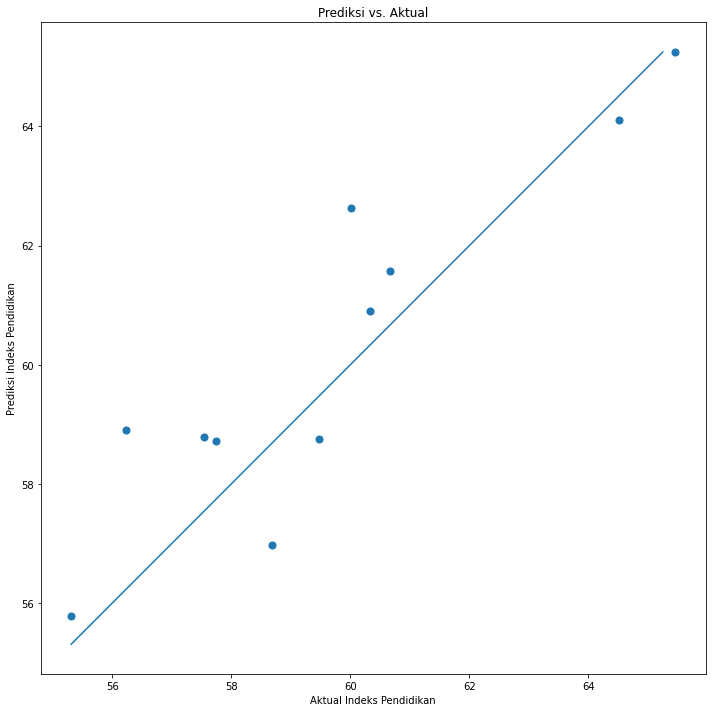

In [75]:
y_pred = xgb_cv.predict(x_test)

y_pred_hasil =pd.DataFrame(y_pred,columns= ['indeks_pendidikan'])
y_test_hasil =pd.DataFrame(y_test,columns= ['indeks_pendidikan'])

y_pred_inversed = scaler_target.inverse_transform(y_pred_hasil)
y_test_inversed = scaler_target.inverse_transform(y_test_hasil)

perbandingan = pd.DataFrame(np.concatenate((y_test_inversed, y_pred_inversed), axis=1) , columns = ['Aktual','Prediksi'])
print(tabulate(perbandingan, headers = 'keys', tablefmt = 'github'))

plt.figure(figsize=(10, 10))
plt.scatter(y_test_inversed, y_pred_inversed, s=50)
plt.title('Prediksi vs. Aktual')
plt.xlabel('Aktual Indeks Pendidikan')
plt.ylabel('Prediksi Indeks Pendidikan')


plt.plot([min(y_test_inversed), max(y_pred_inversed)], [min(y_test_inversed), max(y_pred_inversed)])
plt.tight_layout()

Dari grafik ini, didapat bahwa model dapat memprediksi indeks pendidikan berdasarkan model dan fitur yang digunakan

# Feature Importance

## Cek Fitur Paling Berpengaruh

Untuk mengetahui fitur apa yang paling berpengaruh pada indeks pendidikan

Gunakan Best Model yaitu **XGBoost Regression** dan fitur terbaik pada modelling di atas

Lakukan pengecekan pada model di data training:

In [76]:
feat_importances = xgb_cv.best_estimator_.feature_importances_

In [77]:
feat_importances

array([0.08799516, 0.1628106 , 0.07200911, 0.02113144, 0.10367522,
       0.02907884, 0.02328162, 0.02414695, 0.01213944, 0.02203629,
       0.07640409, 0.11611512, 0.09660721, 0.03040238, 0.03600081,
       0.020756  , 0.06540971], dtype=float32)

In [78]:
x_train.columns

Index(['status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)'],
      dtype='object')

Text(0.5, 0, 'XGBoost Feature Importance')

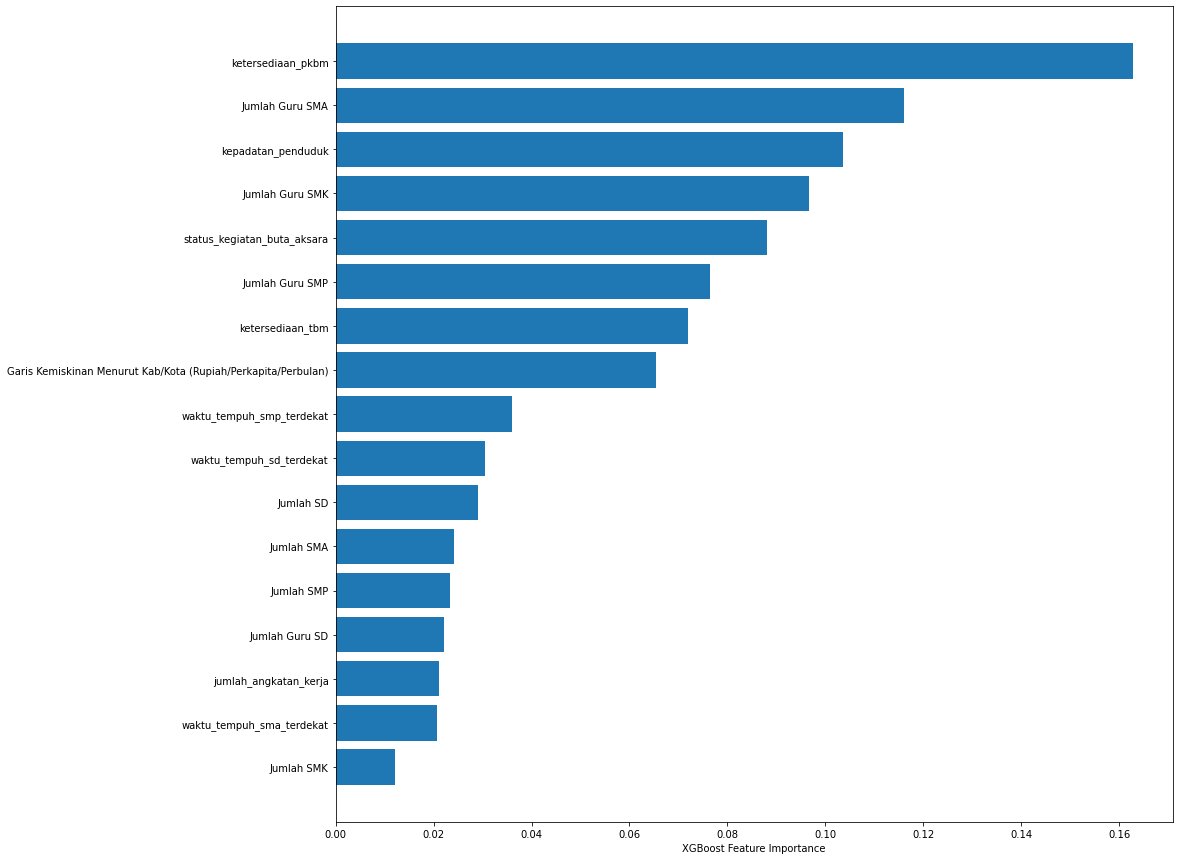

In [79]:
sorted_idx = feat_importances.argsort()
plt.figure(figsize=(15,15))
plt.barh(x_train.columns[sorted_idx], feat_importances[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

Lakukan pengecekan fitur paling berpengaruh pada model di data test:

Cek dengan **SHAP Values**
(dalam konteks ini menggunakan plots bar, yang bernilai absolut)

source: https://shap.readthedocs.io/en/latest/

In [80]:
explainer = shap.Explainer(xgb_cv.best_estimator_.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 12it [00:11,  1.41s/it]


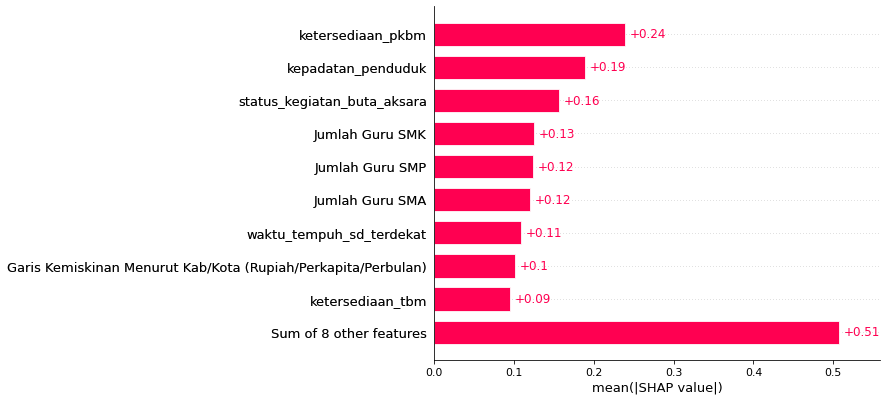

In [81]:
shap.plots.bar(shap_values)

Dapat diketahui bahwa **FITUR** yang paling berpengaruh pada **INDEKS PENDIDIKAN** adalah  **Ketersediaan Pusat Kegiatan Belajar**

## Sanity Check dengan model lain

Gunakan model Adaboost untuk mengecek fitur paling berpengaruh di data training

In [82]:
feat_importances_ada = adaboost_cv.best_estimator_.feature_importances_

In [83]:
feat_importances_ada 

array([0.09038097, 0.34879315, 0.06103822, 0.02975788, 0.05530221,
       0.00762494, 0.02829781, 0.01951058, 0.00872963, 0.04084854,
       0.02423846, 0.03714467, 0.01706107, 0.0912114 , 0.01066531,
       0.04623441, 0.08316075])

In [84]:
x_train.columns

Index(['status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)'],
      dtype='object')

Text(0.5, 0, 'Adaboost Feature Importance')

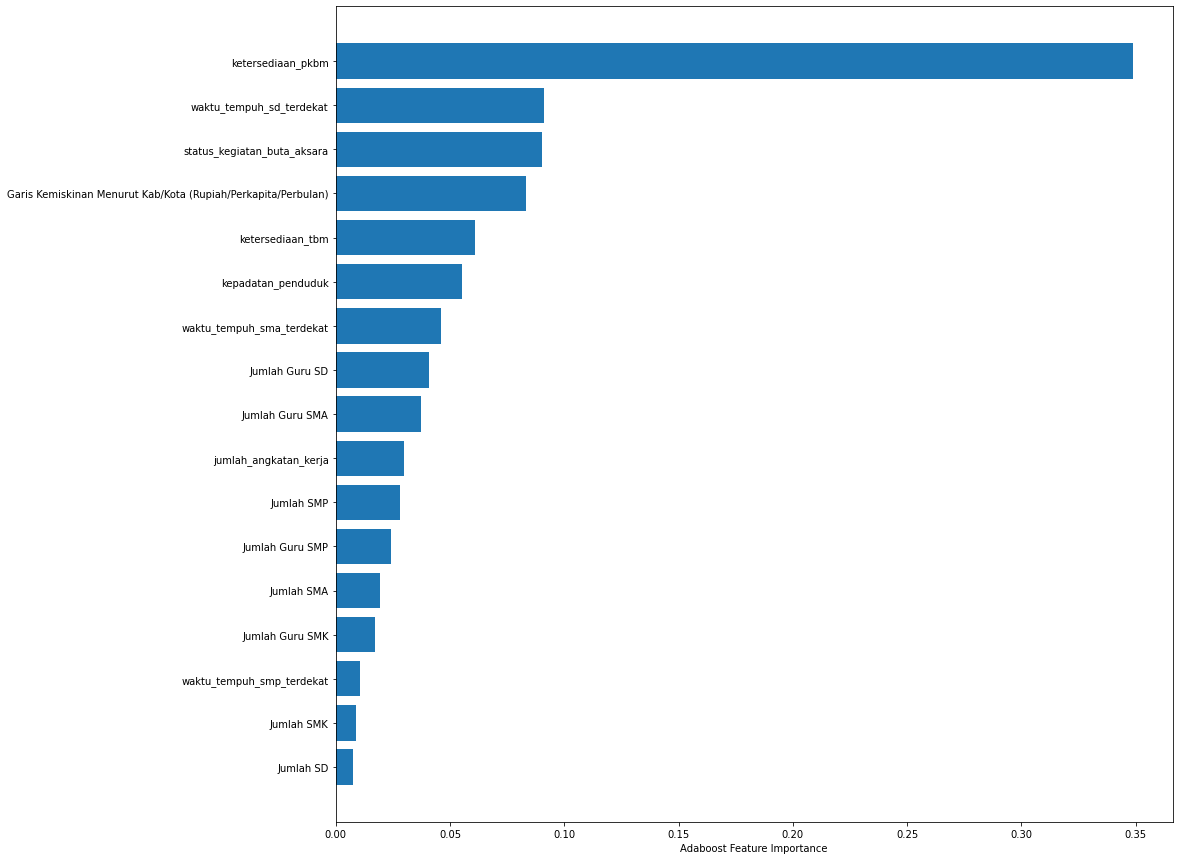

In [85]:
sorted_idx = feat_importances_ada.argsort()
plt.figure(figsize=(15,15))
plt.barh(x_train.columns[sorted_idx], feat_importances_ada[sorted_idx])
plt.xlabel("Adaboost Feature Importance")

Gunakan Juga linear dengan koefisien untuk mengecek apakah memiliki trend yang sama di data training

In [86]:
LinearRegression_cv.best_estimator_.coef_

array([ 0.05009494, -0.54228735,  0.00917856,  0.70865699,  0.26805624,
       -0.49070879,  0.92813779, -1.42935042, -0.05701955,  1.67593736,
       -2.56543626,  1.35431779, -0.06539133,  0.05240592,  0.27075266,
       -0.34508189, -0.50715011])

Feature: status_kegiatan_buta_aksara Score: 0.05009494461890064
Feature: ketersediaan_pkbm Score: -0.5422873485683015
Feature: ketersediaan_tbm Score: 0.009178556372304235
Feature: jumlah_angkatan_kerja Score: 0.7086569920863768
Feature: kepadatan_penduduk Score: 0.2680562430557325
Feature: Jumlah SD Score: -0.49070879035639825
Feature: Jumlah SMP Score: 0.9281377887085833
Feature: Jumlah SMA Score: -1.4293504225708529
Feature: Jumlah SMK Score: -0.057019547987294576
Feature: Jumlah Guru SD Score: 1.675937356641375
Feature: Jumlah Guru SMP Score: -2.565436259577361
Feature: Jumlah Guru SMA Score: 1.3543177858607456
Feature: Jumlah Guru SMK Score: -0.06539132559138697
Feature: waktu_tempuh_sd_terdekat Score: 0.052405919376205055
Feature: waktu_tempuh_smp_terdekat Score: 0.27075265924317937
Feature: waktu_tempuh_sma_terdekat Score: -0.3450818930910739
Feature: Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan) Score: -0.5071501146450536


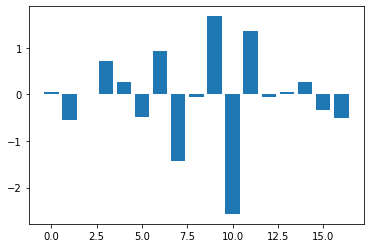

In [87]:
importance = LinearRegression_cv.best_estimator_.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature:', x_train.columns[i] ,'Score:', v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Dapat diketahui bahwa koefisien Adaboost yang paling berpengaruh pada **INDEKS PENDIDIKAN** adalah ketersediaan_pkbm atau **Ketersediaan Pusat Kegiatan Belajar**

Cocok dengan model awal yaitu XGBoost

Pada linear regression, fitur paling berpengaruh adalah Jumlah Guru SMP, namun karena rmse nya terlalu tinggi dan r2 score terlalu rendah, maka diasumsikan bahwa linear regression kurang tepat memperediksi model

## Cek pengaruh positif/negatif dari Fitur paling berpengaruh

#### **Menggunakan Correlation**

In [88]:
#Loaddataset
cek_data = df_ready.copy()

In [89]:
df_ready.head(10)

,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


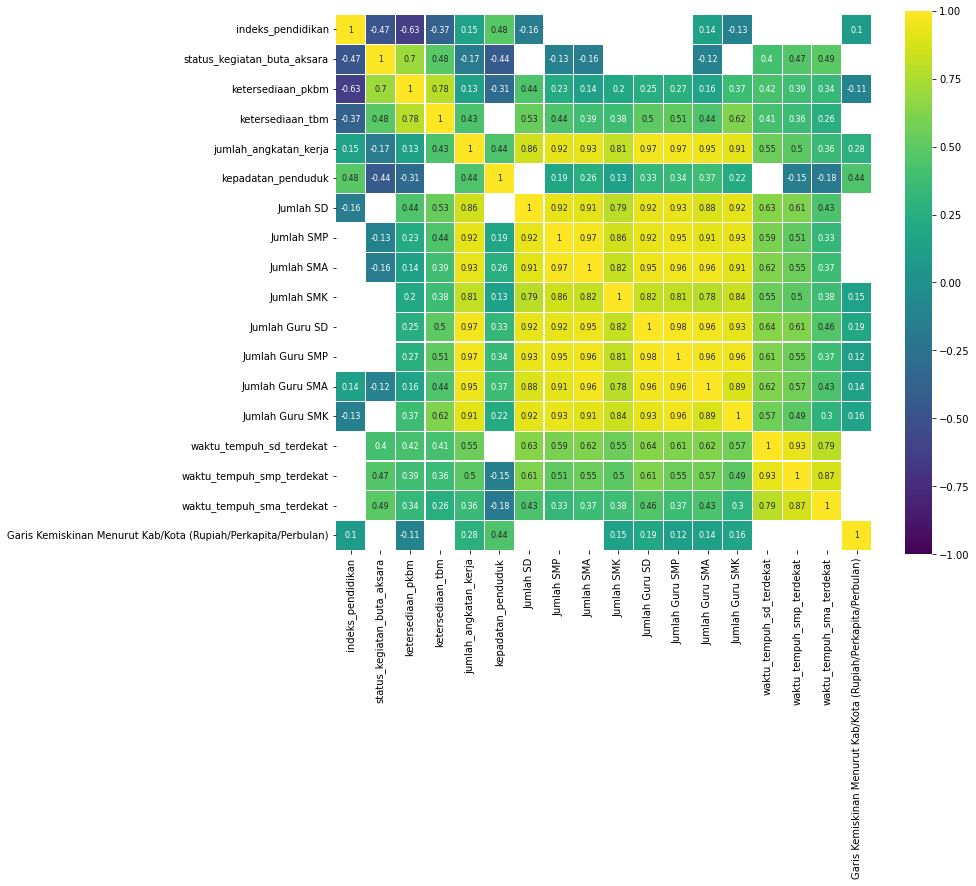

In [90]:
cols= ['indeks_pendidikan',
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
corr = cek_data[cols].corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

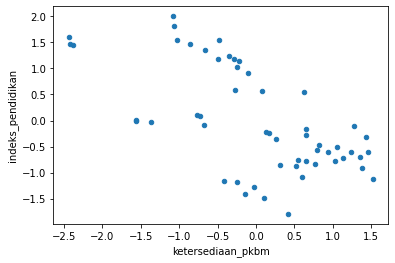

In [91]:
cek_data.plot(kind='scatter', x='ketersediaan_pkbm', y='indeks_pendidikan')

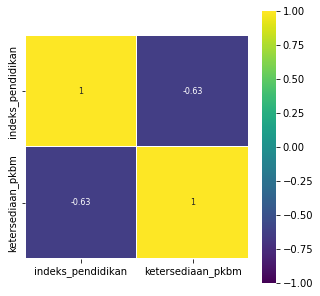

In [92]:
cols_1= [
       'indeks_pendidikan', 'ketersediaan_pkbm']
corr = cek_data[cols_1].corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Terlihat memang terdapat trend ketersediaan pusat kegiatan belajar terhadap nilai indeks pendidikan, namun korelasi yang negatif menandakan bahwa semakin **meningkatnya jumlah pusat kegiatan belajar**, membuat **indeks pendidikan menurun**

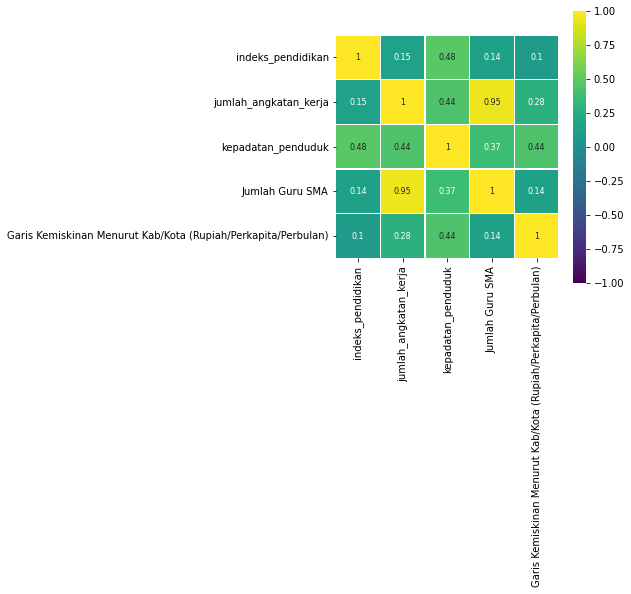

In [93]:
cols_2= ['indeks_pendidikan',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah Guru SMA', 
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
corr = cek_data[cols_2].corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Sedangkan terdapat korelasi yang **positif** antara **indeks pendidikan** terhadap **kepadatan penduduk, Jumlah angkatan Kerja, Jumlah Guru SMA, dan Garis kemiskinan (rupiah/perkapita/perbulan)**

#### **Menggunakan SHAP Values**

Menggunakan Shap values untuk mengecek **impact tiap fitur**, dengan melakukan terhadap data test

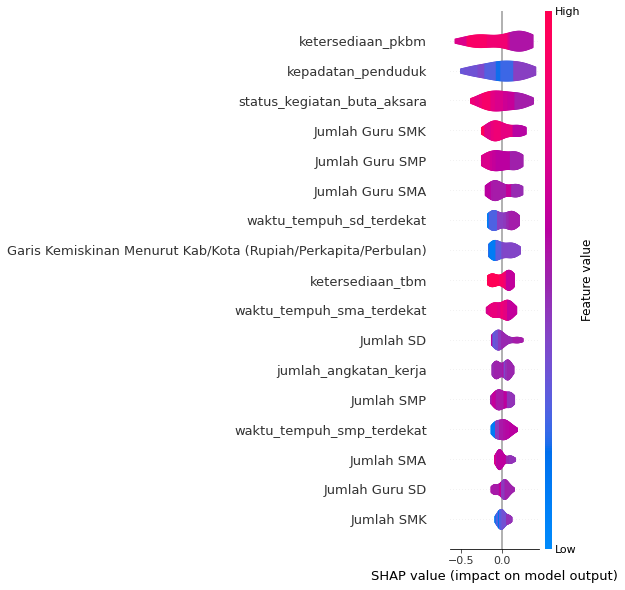

In [94]:
shap.summary_plot(shap_values, plot_type='violin')

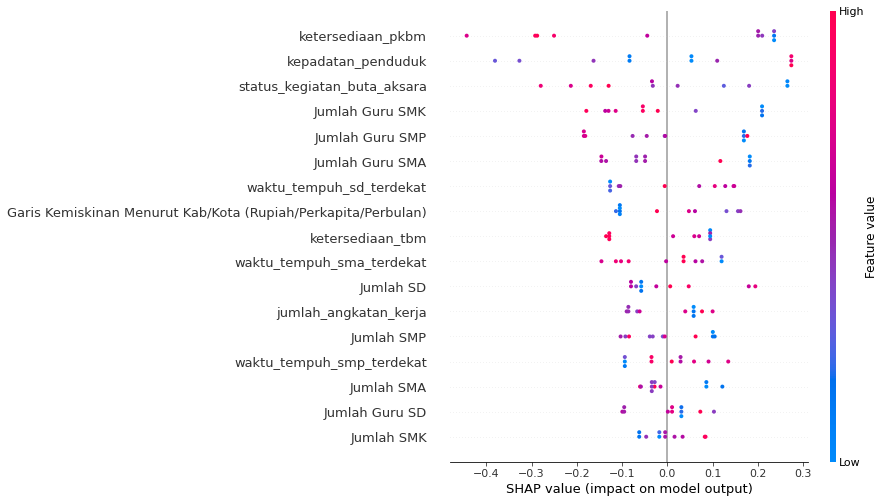

In [95]:
shap.plots.beeswarm(shap_values,max_display=30)

Dalam penggunaan summary plot & beeswarm, diketahui bahwa urutan dari paling atas ke paling bawah menunjukkan impactnya, dengan fitur paling atas menyatakan paling berpengaruh

Dapat terlihat bahwa ketersediaan_pkbm atau **Ketersediaan Pusat Kegiatan Belajar**, mempunyai pengaruh paling tinggi, namun **impact** on model output cenderung ke arah **negatif**, menandakan bahwa fitur ini berimpact negatif terhadap indeks pendidikan

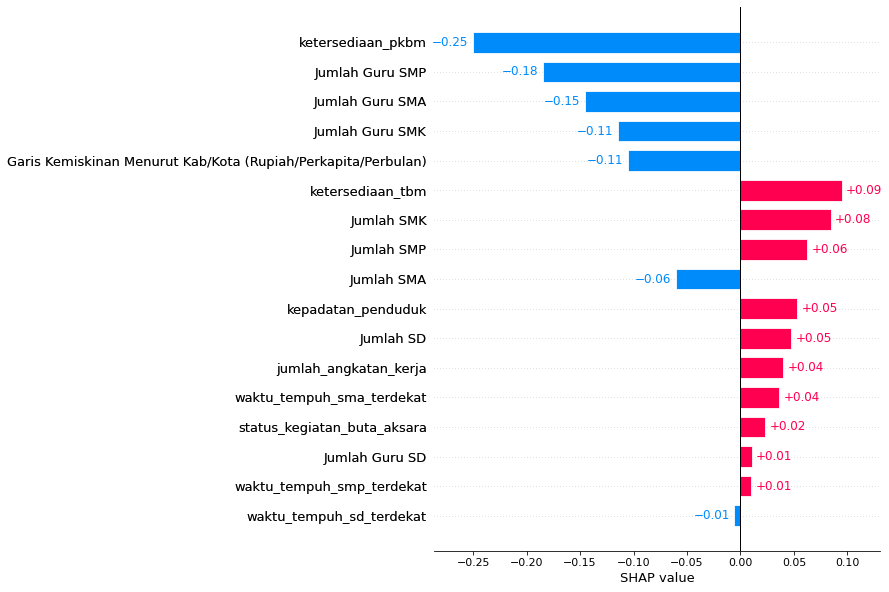

In [96]:
shap.plots.bar(shap_values[0],max_display=30 )

Dalam penggunaan Local bar (plots bar), pengaruh fitur lebih dijabarkan dalam bentuk angka dan dapat terlihat magnitudo maupun impact tiap fitur ketika sudah mempertimbangkan semua fitur

Dapat terlihat bahwa ketersediaan_pkbm atau Ketersediaan Pusat Kegiatan Belajar, memberikan impact yang paling negatif, di angka -0.61, sedangkan fitur yang memberikan nilai positif adalah:

1. Ketersediaan tbm (+0.09)
2. Jumlah SMK (+0.08)
3. Jumlah SMP (+0.06)


# Kesimpulan

Kesimpulan:

1. Model terbaik untuk prediksi ini adalah **XGBoost** dengan metric RMSE 0.25 dan R2 Score 0.94. Metrik RMSE ini paling kecil dibandingkan dengan model lainnya

2. Model lain yang digunakan adalah Linear Regression, Lasso, Ridge, Bayesian Ridge, Elastic Net, Huber Regression, Random Forest, Decision Tree, support vector, SGD, gradient boosting, kneighbors dan Adaboost

3. Fitur paling berpengaruh adalah **jumlah kegiatan pusat belajar**. namun fitur ini mempunyai **impact negatif**, sehingga semakin banyak kegiatan pusat belajar, maka semakin turun nilai indeks pendidikan

4. Fitur yang dapat sekiranya dapat dikontrol oleh pemerintah dan mempunyai dampak positif berdasarkan modelling ini adalah, dengan meningkatkan **Jumlah Perpustakaan** & **Meningkatkan jumlah sekolah secara overall**

5. Asumsi kasar yang dapat diambil adalah, dengan banyaknya kegiatan pusat belajar, maka siswa hanya mengandalkan ilmu yang didapat secara otodidak, bukan melalui instansi pendidikan seperti sekolah, untuk nantinya mempersiapkan diri bekerja

## Save Model

Simpan berbagai macam model dalam folder model

In [97]:
pickle.dump(LinearRegression_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/LinearRegression_cv.pkl", 'wb'))
pickle.dump(lasso_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/lasso_cv.pkl", 'wb'))
pickle.dump(Ridge_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/Ridge_cv.pkl", 'wb'))
pickle.dump(bayesreg_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/bayesreg_cv.pkl", 'wb'))
pickle.dump(elasticnet_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/elasticnet_cv.pkl", 'wb'))
pickle.dump(huber_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/huber_cv.pkl", 'wb'))
pickle.dump(rf_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/rf_cv.pkl", 'wb'))

pickle.dump(decisiontree_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/decisiontree_cv.pkl", 'wb'))
pickle.dump(svr_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/svr_cv.pkl", 'wb'))
pickle.dump(gradientdescent_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/gradientdescent_cv.pkl", 'wb'))
pickle.dump(GBR_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/GBR_cv.pkl", 'wb'))

pickle.dump(knnreg_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/knnreg_cv.pkl", 'wb'))
pickle.dump(adaboost_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/adaboost_cv.pkl", 'wb'))
pickle.dump(xgb_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/xgb_cv.pkl", 'wb'))

In [98]:
#Cek apabila bisa diload

#LinearRegression_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/LinearRegression_cv.pkl", 'rb'))
#lasso_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/lasso_cv.pkl", 'rb'))
#Ridge_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/Ridge_cv.pkl", 'rb'))
#bayesreg_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/bayesreg_cv.pkl", 'rb'))
#elasticnet_cv = pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/elasticnet_cv.pkl", 'rb'))
#huber_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/huber_cv.pkl", 'rb'))
#rf_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/rf_cv.pkl", 'rb'))
#decisiontree_cv= pickle.load(open("/content/drive/MyDrive/DatasetHackathon/Model/decisiontree_cv.pkl", 'rb'))
#svr_cv= pickle.load(open("/content/drive/MyDrive/DatasetHackathon/Model/svr_cv.pkl", 'rb'))
#gradientdescent_cv = pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/gradientdescent_cv.pkl", 'rb'))
#GBR_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/GBR_cv.pkl", 'rb'))
#knnreg_cv= pickle.load(  open("/content/drive/MyDrive/DatasetHackathon/Model/knnreg_cv.pkl", 'rb'))
#adaboost_cv= pickle.load( open("/content/drive/MyDrive/DatasetHackathon/Model/adaboost_cv.pkl", 'rb'))


xgb_cv = pickle.load ( open("/content/drive/MyDrive/DatasetHackathon/Model/xgb_cv.pkl", 'rb'))

xgb_cv

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(eta=0.1, max_depth=10,
                                          min_child_weight=5, missing=nan,
                                          objective='reg:squarederror',
                                          seed=42),
                   param_distributions={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.01  , 0.0575, 0.105 , 0.1525, 0.2   ]),
                                        'max_depth': array([3, 5, 7, 9]),
                                        'n_estimators': [300, 400, 500, 600,
                                                         700, 800, 900],
                                        'subsample': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
                   scoring='neg_mean_squared_error')

Simpan scaler untuk serving model

In [99]:
import pickle
pickle.dump(scaler_fitur, open('/content/drive/MyDrive/DatasetHackathon/Scaler/scaler_fitur.pkl','wb'))
pickle.dump(scaler_target, open('/content/drive/MyDrive/DatasetHackathon/Scaler/scaler_target.pkl','wb'))

In [100]:
#Cek apabila bisa diload
scaler_fitur = pickle.load(open("/content/drive/MyDrive/DatasetHackathon/Scaler/scaler_fitur.pkl", 'rb'))
#scaler_target = pickle.load(open("/content/drive/MyDrive/DatasetHackathon/Scaler/scaler_target.pkl", 'rb'))
scaler_fitur

StandardScaler()

# Serving model

In [101]:
features= x_train.columns.to_list()
features

['status_kegiatan_buta_aksara',
 'ketersediaan_pkbm',
 'ketersediaan_tbm',
 'jumlah_angkatan_kerja',
 'kepadatan_penduduk',
 'Jumlah SD',
 'Jumlah SMP',
 'Jumlah SMA',
 'Jumlah SMK',
 'Jumlah Guru SD',
 'Jumlah Guru SMP',
 'Jumlah Guru SMA',
 'Jumlah Guru SMK',
 'waktu_tempuh_sd_terdekat',
 'waktu_tempuh_smp_terdekat',
 'waktu_tempuh_sma_terdekat',
 'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

In [102]:
input_data = pd.DataFrame()
for i in features:
  print(i)

  if i =='status_kegiatan_buta_aksara':
    print("Input berapa persen tiap kabupaten/kota(dalam bentuk desimal)")
  if i =='ketersediaan_pkbm':
    print("Input jumlah ketersediaan pusat kegiatan belajar di kabupaten/kota")
  if i =='ketersediaan_tbm':
    print("Input jumlah perpustakaan di kabupaten/kota")
  if i =='jumlah_angkatan_kerja':
    print("Input jumlah angkatan kerja di kabupaten/kota")
  if i =='kepadatan_penduduk':
    print("Input kepadatan penduduk di kabupaten/kota")
  if i =='Jumlah SD':
    print("Input jumlah sd di kabupaten/kota")
  if i =='Jumlah SMP':
    print("Input jumlah smp di kabupaten/kota")
  if i =='Jumlah SMA':
    print("Input jumlah sma di kabupaten/kota")
  if i =='Jumlah SMK':
    print("Input jumlah smk di kabupaten/kota")
  if i =='Jumlah Guru SD':
    print("Input jumlah guru sd di kabupaten/kota")
  if i =='Jumlah Guru SMP':
    print("Input jumlah guru smp di kabupaten/kota")  
  if i =='Jumlah Guru SMA':
    print("Input jumlah guru sma di kabupaten/kota")
  if i =='Jumlah Guru SMK':
    print("Input jumlah guru smk di kabupaten/kota")
  if i =='waktu_tempuh_sd_terdekat':
    print("Input waktu tempuh sd di kabupaten/kota(dalam menit)")
  if i =='waktu_tempuh_smp_terdekat':
    print("Input waktu tempuh smp di kabupaten/kota(dalam menit)")
  if i =='waktu_tempuh_sma_terdekat':
    print("Input waktu tempuh sma di kabupaten/kota(dalam menit)")
  if i =='Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)':
    print("Input nilai Rupiah/Perkapita/Perbulan di kabupaten/kota")
  number = float(input("Enter your value: "))
  
  if number < 0 :
    print("Please input non-negative value ")
    break
  else:
    pass
  x=' '
  print(x)
  column_name = i
  input_data.loc[0, column_name] = number

status_kegiatan_buta_aksara
Input berapa persen tiap kabupaten/kota(dalam bentuk desimal)
Enter your value: 0.9
 
ketersediaan_pkbm
Input jumlah ketersediaan pusat kegiatan belajar di kabupaten/kota
Enter your value: 2000
 
ketersediaan_tbm
Input jumlah perpustakaan di kabupaten/kota
Enter your value: 3000
 
jumlah_angkatan_kerja
Input jumlah angkatan kerja di kabupaten/kota
Enter your value: 200000
 
kepadatan_penduduk
Input kepadatan penduduk di kabupaten/kota
Enter your value: 2000
 
Jumlah SD
Input jumlah sd di kabupaten/kota
Enter your value: 500
 
Jumlah SMP
Input jumlah smp di kabupaten/kota
Enter your value: 600
 
Jumlah SMA
Input jumlah sma di kabupaten/kota
Enter your value: 400
 
Jumlah SMK
Input jumlah smk di kabupaten/kota
Enter your value: 250
 
Jumlah Guru SD
Input jumlah guru sd di kabupaten/kota
Enter your value: 1000
 
Jumlah Guru SMP
Input jumlah guru smp di kabupaten/kota
Enter your value: 1200
 
Jumlah Guru SMA
Input jumlah guru sma di kabupaten/kota
Enter your val

In [103]:
input_data

,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,0.9,2000.0,3000.0,200000.0,2000.0,500.0,600.0,400.0,250.0,1000.0,1200.0,700.0,400.0,5.0,10.0,15.0,350000.0


In [104]:
input_data = input_data.transpose().reindex(features).transpose()

In [105]:
cols= [
 'status_kegiatan_buta_aksara',
 'ketersediaan_pkbm',
 'ketersediaan_tbm',
 'jumlah_angkatan_kerja',
 'kepadatan_penduduk',
 'Jumlah SD',
 'Jumlah SMP',
 'Jumlah SMA',
 'Jumlah SMK',
 'Jumlah Guru SD',
 'Jumlah Guru SMP',
 'Jumlah Guru SMA',
 'Jumlah Guru SMK',
 'waktu_tempuh_sd_terdekat',
 'waktu_tempuh_smp_terdekat',
 'waktu_tempuh_sma_terdekat',
 'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

In [106]:
inputdata = pd.DataFrame(scaler_fitur.transform(input_data[cols]),columns = cols)

In [109]:
#Prediction:
result_prediction= xgb_cv.predict(inputdata)
data_hasil =pd.DataFrame(result_prediction,columns= ['indeks_pendidikan'])
inversed_result = scaler_target.inverse_transform(data_hasil)
print("Hasil prediksi nilai indeks pendidikan berdasarkan kondisi anda", inversed_result )

Hasil prediksi nilai indeks pendidikan berdasarkan kondisi anda [[61.025497]]
